## FOR COMP90024 ASSIGNMENT 2
### BY TEAM 45:
- William Chen 1400081
- Petr Andreev 1375858
- Rafsan Al Mamun 1407776
- Ojaswi Dheer 1447227

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import calendar
import time

sys.path.append('../')
from backend.constants import *
import backend.querying.query_path_constants as query_constants

from api import * # see api.py

# Set display options for pandas DataFrame
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)        # Set display width

In [3]:
# Map month number to month name
averaged_data_monthly = dataframe_from_url_ext(f'/data/sentiment_weather/{query_constants.AVG_MONTHLY_ANALYSIS}')
averaged_data_monthly['Month'] = pd.to_datetime(averaged_data_monthly['Month'], format='%m').dt.strftime('%B')
averaged_data_monthly

Fetching from http://localhost:9090/data/sentiment_weather/avg_monthly_analysis


,Month,Avg Rainfall,Avg Max Temp,Avg Sentiment (Scaled)
0,January,102.671973,28.614161,163.199815
1,February,94.827073,28.104482,165.369634
2,March,82.849489,26.611396,155.137950
3,April,56.558309,23.947903,172.094591
4,May,56.675299,20.878706,175.378909
5,June,56.738871,18.313052,117.902809
6,July,54.288335,18.016107,128.665322
7,August,54.868929,19.076714,142.226409
8,September,50.366352,21.335883,137.521617
9,October,60.878934,23.500074,144.126101


## Sentiment Analysis


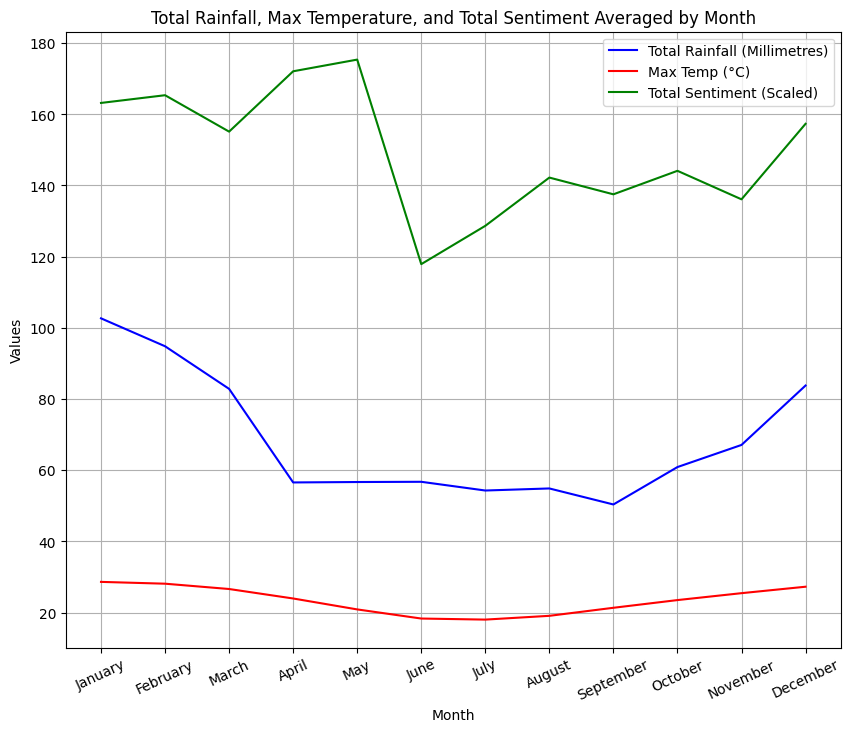

In [13]:
# Line plot
plt.figure(figsize=(10, 8))
plt.plot(averaged_data_monthly['Month'], averaged_data_monthly['Avg Rainfall'], color='blue', label='Total Rainfall (Millimetres)')
plt.plot(averaged_data_monthly['Month'], averaged_data_monthly['Avg Max Temp'], color='red', label='Max Temp (°C)')
plt.plot(averaged_data_monthly['Month'], averaged_data_monthly['Avg Sentiment (Scaled)'], color='green', label='Total Sentiment (Scaled)')
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Total Rainfall, Max Temperature, and Total Sentiment Averaged by Month')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=25)
plt.show()

### Insights from Historical Analysis:

From the graph, we can make the following conclusions:

1. **General Observations:** The total rainfall ranged from 50.36 mm in September to 102.67 mm in January. Average maximum temperatures varied from 18.02°C in July to 28.61°C in January, while the scaled total sentiment ranged from 117.90 in June to 175.38 in May.

2. **Seasonal Patterns:**

   - **Summer (December to February):**
     During the summer months, average temperatures range from 27.25°C to 28.61°C, accompanied by moderate to high rainfall, varying between 83.79 mm and 102.67 mm. This period coincides with the highest sentiment values in January and February. It appears that the combination of warm weather and the holiday season contributes significantly to an elevated public mood, as people engage in outdoor activities and vacations.

   - **Autumn (March to May):**
     In autumn, temperatures gradually decrease from 26.61°C in March to 20.88°C in May, with a decrease in average rainfall. Despite this trend, sentiment values remain high, especially in May. This sustained positive sentiment could likely be due to the generally mild and pleasant weather conditions, which encourage social interactions.

   - **Winter (June to August):**
     Winter is characterized by the lowest temperatures, ranging from 18.02°C to 19.08°C, and lower rainfall, between 54.29 mm and 56.74 mm. During this season, sentiment values drop to their lowest, particularly in June. This could be due to colder weather and shorter daylight hours, which seem to contribute to reduced outdoor activities and social engagements, leading to a lower overall sentiment during these months.

   - **Spring (September to November):**
     Spring marks a period of rising temperatures, from 21.34°C in September to 25.44°C in November, along with increasing levels of rainfall. During this season, sentiment values are moderately high. This implies that improving weather conditions enhance public emotions, positively impacting overall sentiment.


In [4]:
correlation_rainfall = averaged_data_monthly['Avg Sentiment (Scaled)'].corr(averaged_data_monthly['Avg Rainfall'])
correlation_temp = averaged_data_monthly['Avg Sentiment (Scaled)'].corr(averaged_data_monthly['Avg Max Temp'])
correlation_temp_rain = averaged_data_monthly['Avg Rainfall'].corr(averaged_data_monthly['Avg Max Temp'])

print("Correlation between Total Rainfall and Mean Max Temp:", correlation_temp_rain)
print("Correlation between Total Sentiment and Total Rainfall:", correlation_rainfall)
print("Correlation between Total Sentiment and Mean Max Temp:", correlation_temp)


Correlation between Total Rainfall and Mean Max Temp: 0.87290927755709
Correlation between Total Sentiment and Total Rainfall: 0.44120707760143546
Correlation between Total Sentiment and Mean Max Temp: 0.581758660369528


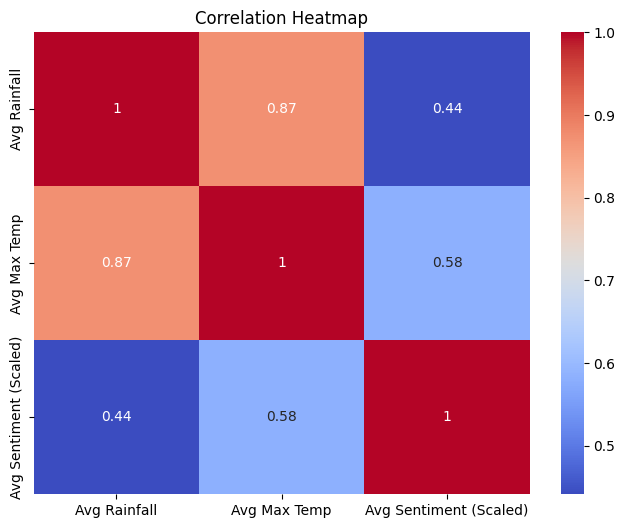

In [5]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(averaged_data_monthly.drop(columns='Month').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Insights from Correlation:
- A strong positive correlation (0.87) exists between total rainfall and mean maximum temperature, suggesting that higher temperatures are often accompanied by increased rainfall.
- A moderate positive correlation (0.44) between total sentiment and total rainfall indicates that more rainfall is somewhat associated with more positive sentiments.
- A positive correlation (0.58) between total sentiment and mean maximum temperature implies that higher temperatures are strongly linked to more positive sentiments.


These insights reveal a noticeable positive correlation between warmer temperatures and higher sentiment scores. Warmer weather likely encourages outdoor activities, social interactions, and general well-being, leading to more positive tweets. Additionally, months with major holidays and vacation periods show higher sentiment scores, suggesting the influence of social and cultural factors. Conversely, extreme weather conditions, particularly cold temperatures and high rainfall, tend to lower sentiment scores, indicating that harsh weather might negatively impact public mood and social media expressions.

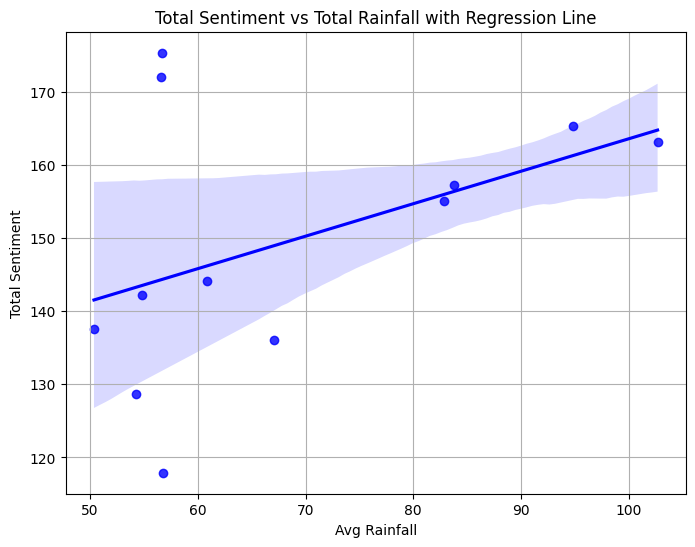

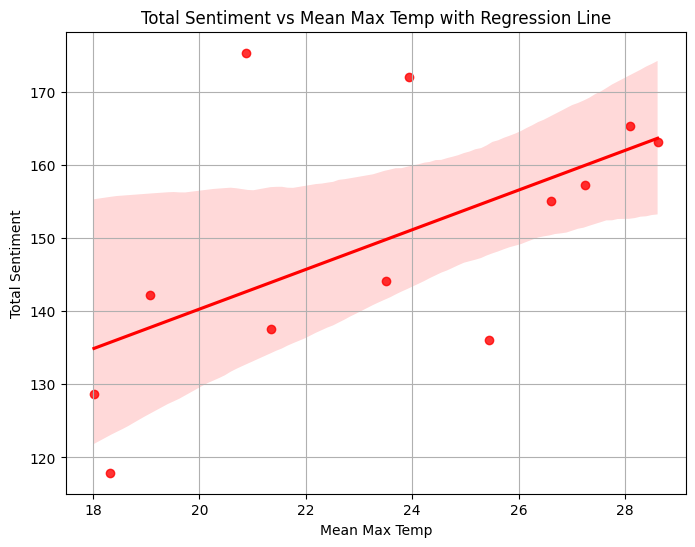

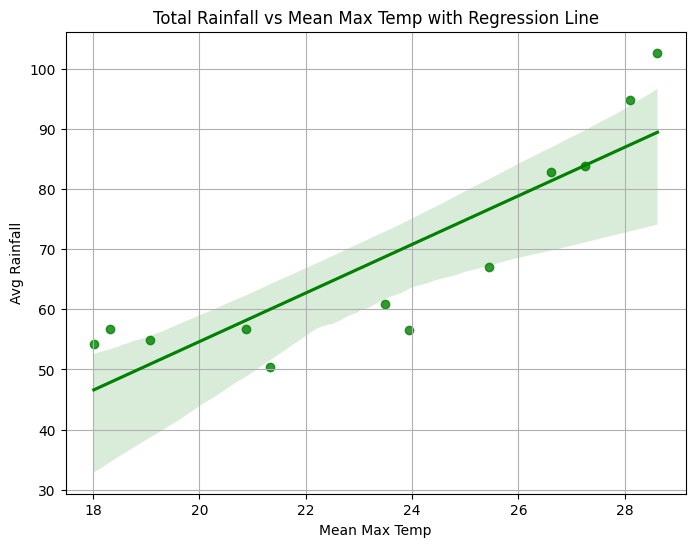

In [6]:
import seaborn as sns

# Scatter plot with regression line for Total Sentiment vs Mean Rainfall
plt.figure(figsize=(8, 6))
sns.regplot(x='Avg Rainfall', y='Avg Sentiment (Scaled)', data=averaged_data_monthly, color='blue')
plt.xlabel('Avg Rainfall')
plt.ylabel('Total Sentiment')
plt.title('Total Sentiment vs Total Rainfall with Regression Line')
plt.grid(True)
plt.show()

# Scatter plot with regression line for Total Sentiment vs Mean Max Temp
plt.figure(figsize=(8, 6))
sns.regplot(x='Avg Max Temp', y='Avg Sentiment (Scaled)', data=averaged_data_monthly, color='red')
plt.xlabel('Mean Max Temp')
plt.ylabel('Total Sentiment')
plt.title('Total Sentiment vs Mean Max Temp with Regression Line')
plt.grid(True)
plt.show()


# Scatter plot with regression line for Total Sentiment vs Mean Max Temp
plt.figure(figsize=(8, 6))
sns.regplot(x='Avg Max Temp', y='Avg Rainfall', data=averaged_data_monthly, color='green')
plt.xlabel('Mean Max Temp')
plt.ylabel('Avg Rainfall')
plt.title('Total Rainfall vs Mean Max Temp with Regression Line')
plt.grid(True)
plt.show()


In [10]:
### Regular Updating
df = dataframe_from_url_ext(f'/data/sentiment_weather/{query_constants.UPDATING_ANALYSIS}')
df['hour'] = pd.to_datetime(df['hour'])


Fetching from http://localhost:9090/data/sentiment_weather/updateing_analysis


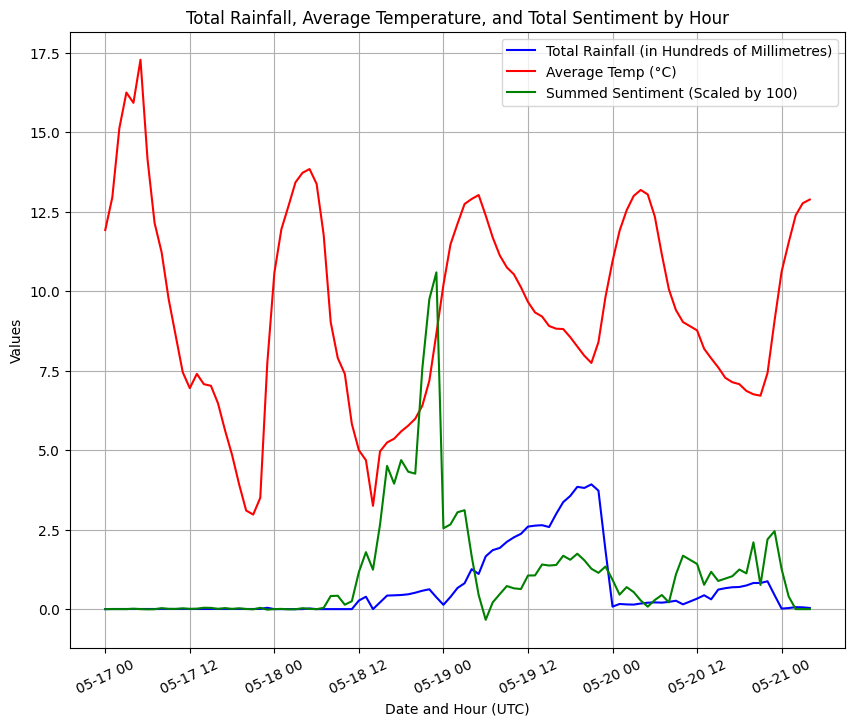

In [11]:
plt.figure(figsize=(10, 8))
plt.plot(df['hour'], df['total rainfall']/100, color='blue', label='Total Rainfall (in Hundreds of Millimetres)')
plt.plot(df['hour'], df['average air temp'], color='red', label='Average Temp (°C)')
plt.plot(df['hour'], df['sum sentiment']/100, color='green', label='Summed Sentiment (Scaled by 100)')
plt.xlabel('Date and Hour (UTC)')
plt.ylabel('Values')
plt.title('Total Rainfall, Average Temperature, and Total Sentiment by Hour')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=25)
plt.show()

In [12]:
df = dataframe_from_url_ext(f'/data/sentiment_weather/{query_constants.MESSAGE_COUNTS_HOURLY}')
df['hour'] = pd.to_datetime(df['hour'])

Fetching from http://localhost:9090/data/sentiment_weather/message_counts_hourly


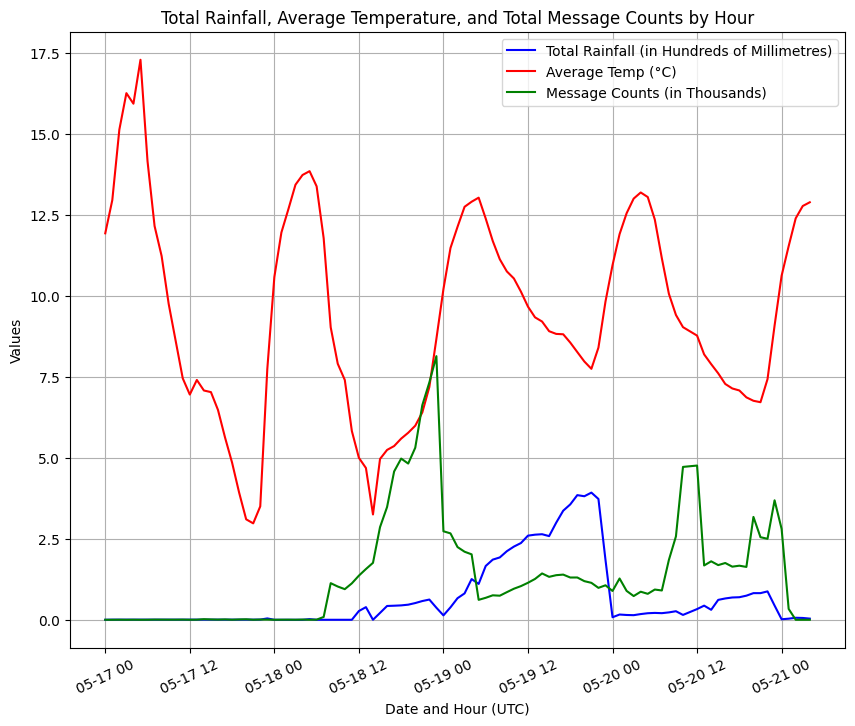

In [13]:
plt.figure(figsize=(10, 8))
plt.plot(df['hour'], df['total rainfall']/100, color='blue', label='Total Rainfall (in Hundreds of Millimetres)')
plt.plot(df['hour'], df['average air temp'], color='red', label='Average Temp (°C)')
plt.plot(df['hour'], df['message counts']/1000, color='green', label='Message Counts (in Thousands)')
plt.xlabel('Date and Hour (UTC)')
plt.ylabel('Values')
plt.title('Total Rainfall, Average Temperature, and Total Message Counts by Hour')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=25)
plt.show()